我希望将 Accommodation 列值为1的这些点在地图上绘制出来

In [2]:
import os
import pandas as pd


df = pd.read_csv(r"D:\POI data\poi_cleaned_data\poi_has_classes.csv")
df.columns


Index(['name', 'pointx_class', 'lat', 'lon', 'poi_class', 'Accommodation',
       'Airports', 'Culture and tourism', 'Eating and drinking', 'Education',
       'Entertainment', 'Health', 'Infrastructure and facilities',
       'Manufacturing and production', 'Office', 'Public transport',
       'Road and rail', 'Service', 'Shopping', 'Water transport'],
      dtype='object')

In [4]:
import geopandas as gpd

# 加载shp文件
london_boundary = gpd.read_file("D:\\大五上\\casa05GIS\\RStudio-project\\week8-practical\\data\\statistical-gis-boundaries-london\\ESRI\\London_Borough_Excluding_MHW.shp")

# 改变坐标系为WGS 84
london_boundary = london_boundary.to_crs("EPSG:4326")
from shapely.geometry import Point

# 创建几何列
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]

# 转换为 GeoDataFrame，设置CRS为WGS 84
geo_df = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")
# 确定每个点是否在伦敦的多边形内
in_london = geo_df['geometry'].apply(lambda x: london_boundary['geometry'].contains(x).any())
# 仅保留在伦敦内的行
df = df[in_london]


In [6]:
df

,name,pointx_class,lat,lon,poi_class,Accommodation,Airports,Culture and tourism,Eating and drinking,Education,Entertainment,Health,Infrastructure and facilities,Manufacturing and production,Office,Public transport,Road and rail,Service,Shopping,Water transport
7,Moat,3170245.0,51.650415,-0.102033,Culture and tourism,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
10,Moat,3170245.0,51.663829,-0.202503,Culture and tourism,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
11,Moat,3170245.0,51.594184,-0.190787,Culture and tourism,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
23,Faith Chapel,6340459.0,51.466459,-0.073611,Infrastructure and facilities,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
25,Kingdom Hall of Jehovah's Witnesses,6340459.0,51.503746,-0.266935,Infrastructure and facilities,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375479,Abbey Community Centre,6340456.0,51.540131,0.071803,Infrastructure and facilities,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
375480,Scouts,6350452.0,51.563827,-0.442227,Office,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
375481,St Albans Church Hall,6340456.0,51.582993,-0.367225,Infrastructure and facilities,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
375482,Brickfield Community Centre,6340456.0,51.482459,-0.314747,Infrastructure and facilities,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


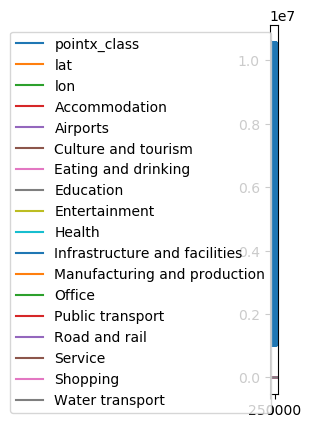

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
london_boundary.boundary.plot(ax=ax, color='black')
df.plot(ax=ax)
plt.show()
